# Bayesian Inference with a Poisson variable and Gamma Prior

The Gamma distribution is conjugate with the Poisson, meaning that when conditioning a Gamma Prior on poisson results, the resulting posterior is also a Gamma distribution.

Specifically, where $Y \sim \text{Poisson}\left(\lambda\right)$, with the $n$ results of experiments on $Y$ being $\tilde{y}$, and the prior being $\lambda \sim Gamma(\alpha, \beta)$.

$$\lambda \mid \tilde{y} \sim Gamma\left(\alpha + \Sigma y_i, \beta + n\right)$$

## Distributions and PDFs

### Poisson Distribution

$$Y \sim \text{Poisson}(\lambda)$$

$$f(y) = \frac{\lambda^y e^{-\lambda}}{y!}$$

### Prior Distribution

$$\lambda \sim Gamma(\alpha, \beta)$$

$$f(\lambda) = \frac{\beta^{\alpha}}{\Gamma(\alpha)} \lambda^{\alpha - 1}  e^{-\beta\lambda}$$

Effective sample size is $\beta$

The Prior mean is $\frac{\alpha}{\beta}$

### Likelyhood Function

$$f(\tilde{y} \mid \lambda) = \frac{\lambda^{\Sigma y_i} e^{-n\lambda}}{\prod_{i=1}^{n} y_i!} \text{ for } \lambda > 0$$


### Posterior distribution

$$\lambda \mid \tilde{y} \sim Gamma\left(\alpha + \Sigma y_i, \beta + n\right)$$

Posterior mean: 

$$\frac{\alpha+\Sigma y_i}{\beta +n} =  \frac{\beta}{\beta +n}  \cdot \frac{\alpha}{\beta}  + \frac{n}{\beta +n} \cdot \frac{\Sigma y_i}{n}$$

### Prior predictive distribution

### Posterior Predictive distribution


The **Prior Predictive** is the mean $\frac{\alpha}{\beta}$

The Standard deviation is $\frac{\sqrt{\alpha}}{\beta}$

The **Posterior Predictive** is $\frac{\beta}{\beta +n}  \cdot \frac{\alpha}{\beta}  + \frac{n}{\beta +n} \cdot \frac{\Sigma y_i}{n}$

Note similiar to the Binomial/Beta conjugation, the posterior predictive is effectively a weighting of the prior predictive mean against the data mean, with an effective sample size of the prior $\beta$.


## Prior selection
### vague prior
Basically let $\lambda \sim \text{Gamma}(\epsilon,\epsilon)$, where $\epsilon$ is a small positive value. That way the mean is 1 abnd the standard devation is $\frac{1}{\epsilon}$, which is very large. That means the pdf is very flat, which is the same thing as saying it contains no information - like a uniform(0,1).

### non-vague prior
If you *want* your prior to contain information, you can pick a mean rate of occurance, then think about how confident you are in that - equivalent both to saying how big the effective sample size is, and how big the standard deviation is. Whichever of these you choose to put a value to, you now either have $\beta$ or $\frac{\sqrt{\alpha}}{\beta}$, and your mean is $\frac{\alpha}{\beta}$, so you can solve for $\alpha$ and $\beta$.

## Python and the gamma function

The `gamma` library, like the others, is in the `scipy.stats` package.

The implementation of gamma in scipy is parameterised with just a mean equivalent to $a=\frac{\alpha}{\beta}$. The formulation of `gamma` functions is `gamma.pdf(x,alpha, scale=1/beta)`

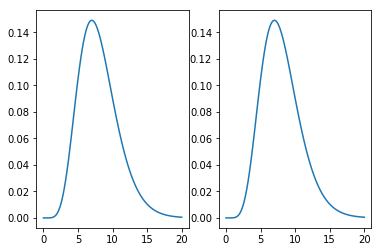

In [8]:
from scipy.stats import gamma
import numpy as np
import matplotlib.pyplot as plt

alpha = 8
beta = 1

fig, axes = plt.subplots(1,2)
x = np.linspace(0,20,101)
y = gamma.pdf(x, alpha, scale = 1/beta)
y2 = gamma.pdf(x,alpha/beta)
axes[0].plot(x,y)
axes[1].plot(x,y2)
plt.show()

**Note CDF isn't equivalent for some reason, no idea why**

`gamma` has the normal function:

`gamma.pdf(x,a)` where a is the mean (or alpha/beta in our parameterisation)
`gamma.cdf(x,a)` cumulative density function 
`gamma.ppf(x,a)` percent point function, inverse of cdf
`gamma.rvs(a)` generates random variables